# CLT Session Flow Cheatsheet

- **CLT** stands for "Central Limit Theorem"
- Analyze the dataset of `mpg` from **seaborn**
- Using **Impirical** formula on this dataset.

## Importing depandencies

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, shapiro, normaltest, jarque_bera, boxcox, yeojohnson

## Loading dataset **mpg** using `seaborn`

In [2]:
mtcars = sns.load_dataset("mpg").dropna()
mtcars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## Analysis of Data

### Getting *mean* and *std* for **Miles per Gallon**

In [3]:
col = "mpg"
data = mtcars[col]

mean,std = data.mean(), data.std()
print("mean", mean)
print("std", std)

mean 23.445918367346938
std 7.8050074865717995


### Generating **histogram** for this data

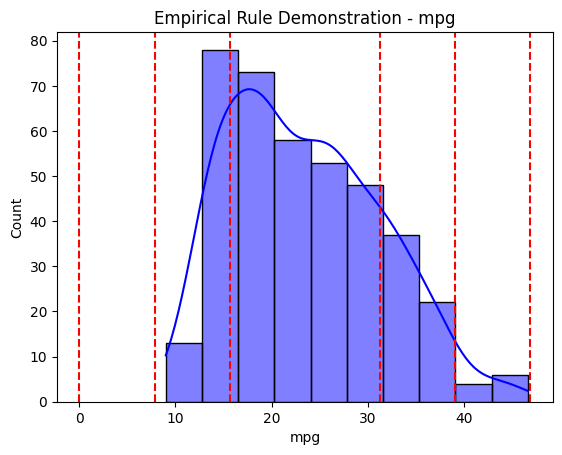

In [4]:
sns.histplot(data, kde=True, bins=10, color='blue')

for i in range(1,4):
    plt.axvline(mean + i*std, color="red", linestyle="--")
    plt.axvline(mean - i*std, color="red", linestyle="--")

plt.title(f"Empirical Rule Demonstration - { col }")
plt.show()

### Calculation of `Skewness` of Dataset

- Skewness between -0.5 and +0.5 -> fairly symmetric
- Skewness between -1 and -0.5 or +0.5 and +! -> moderately symmetric
- Skewness < -1 ot > +1 -> highly skewed.

horsepower Skewness: 1.08


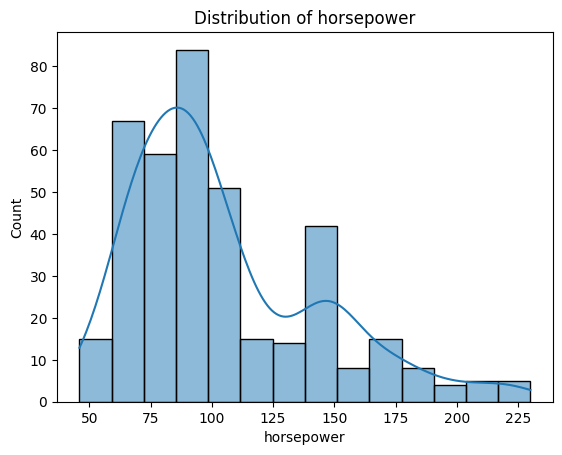

weight Skewness: 0.52


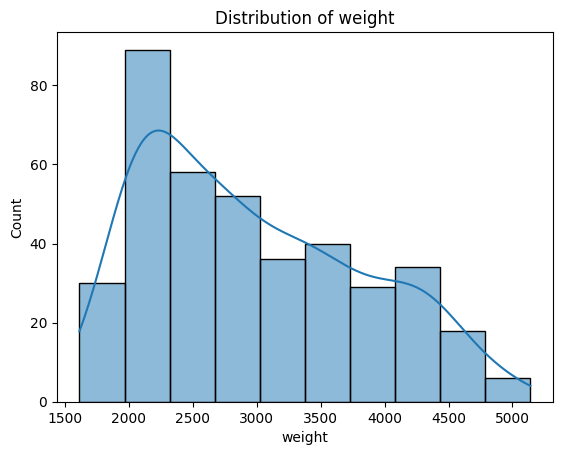

mpg Skewness: 0.46


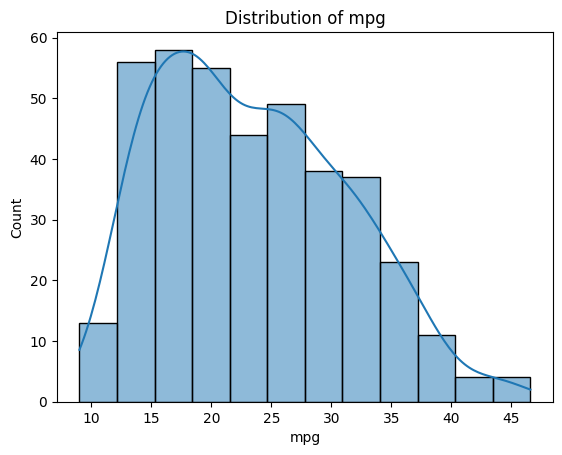

In [5]:
for col in ["horsepower", "weight", "mpg"]:
    print(f"{col} Skewness: {skew(mtcars[col]):.2f}")
    sns.histplot(mtcars[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

### Calculation of `Kurtosis` of the Dataset

Normal Distribution has kurtosis ≃ 3 (called mesokurtic).

- Kurtosis ≃ 3 -> Mesokurtic (similar to normal distribution)  
- Kurtosis < 3 -> Platykurtic (flatter distribution)  
- Kurtosis > 3 -> Leptokurtic (sharp peak)

horsepower Kurtosis: 0.67


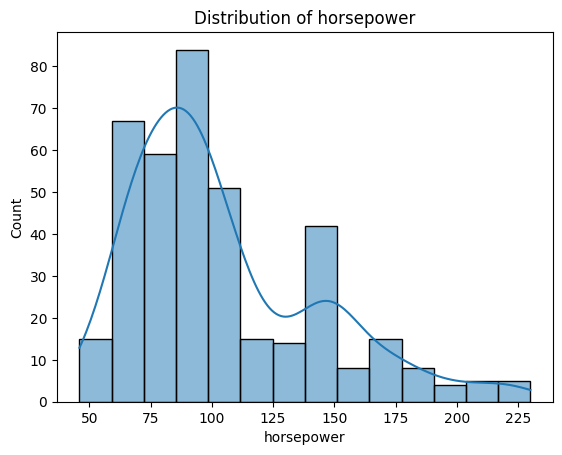

weight Kurtosis: -0.81


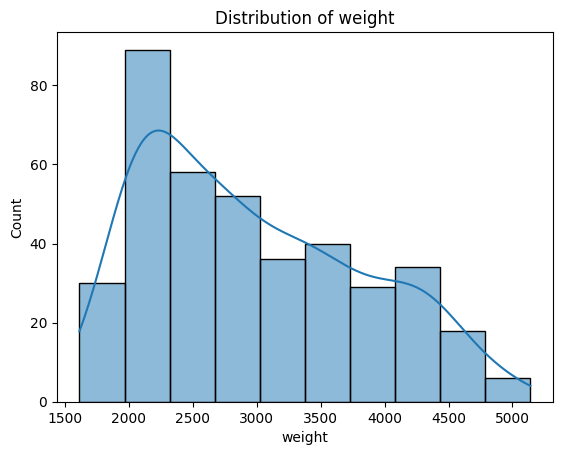

mpg Kurtosis: -0.52


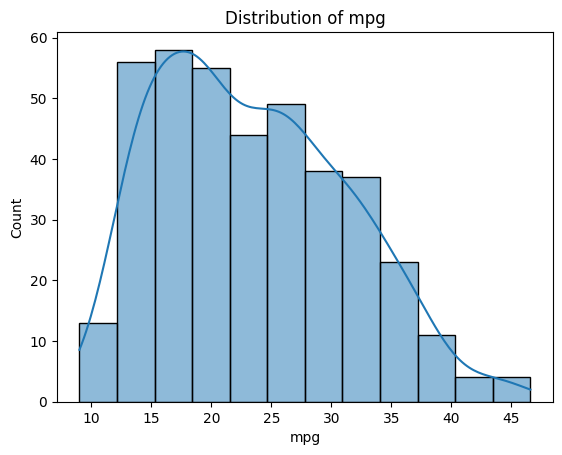

In [6]:
for col in ["horsepower", "weight", "mpg"]:
    print(f"{col} Kurtosis: {kurtosis(mtcars[col]):.2f}")
    sns.histplot(mtcars[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

## Normality Test

The p-value is the probability of observing your data

- p <= 0.05 -> Reject H0(data os unlikely under H0).
- p > 0.05 -> Fail to reject H0(data is consistent H0).

Important: "Fail to reject H0" does not mean "H0 is true."

### Shapiro-Wilk Test

In [7]:
stat, p = shapiro(data)
print(f"Shapiro-Wilk Test: p = {p:.4f} -> {'Normal' if p > 0.05 else 'Not Normal'}")

Shapiro-Wilk Test: p = 0.0000 -> Not Normal


### D'Agostino's K² Test

In [8]:
stat, p = normaltest(data)
print(f"D'Agostino's K² Test: p = {p:.4f} -> {'Normal' if p > 0.05 else 'Not Normal'}")

D'Agostino's K² Test: p = 0.0000 -> Not Normal


### Jarque-Bera Test

In [9]:
stat, p = jarque_bera(data)
print(f"Jarque-Bera Test: p = {p:.4f} -> {'Normal' if p > 0.05 else 'Not Normal'}")

Jarque-Bera Test: p = 0.0001 -> Not Normal


## Types of Transformation

1. **Log Transformation**:

- Log transformation is applied if the data is `right skewed`.
- Applicable on only `positive values`.

2. **Square Root Transformation**:

- It is applied when the data has moderate right skewness
- It can handle positive values and zero also

3. **Cube Root Transformation**:

- It can handle both positively and negatively skewed data and may except positive and negative values.

4. **Box-Cox Transformation**:

- It uses both power transformation and Log Transformation but the data must be strictly positive
- It is very sensitive to the outliers.

5. **Yoe-Jhonson Transformation**:

- It can handle both positive and negative values.

In [11]:
col = "acceleration"
data = mtcars[col]

transformations = {
    "Original": data,
    "Log":np.log(data),
    "Square-Root":np.sqrt(data),
    "Cube-Root":np.cbrt(data)
}

if(data > 0).all():
    # Box-Cox (unsafe for negative values)
    transformations["Box-Cox"], _ = boxcox(data)
    # Yeo-Johnson (safe for negative values)
    transformations["Yeo-Johnson"], _ = yeojohnson(data)

    for name,tdata in transformations.items():
        if tdata is not None:
            stat, p = shapiro(tdata)
            print(f"{name:<12} -> Shapiro p={p:.4f} -> {'Normal' if p > 0.05 else 'Not Normal'}")

Original     -> Shapiro p=0.0305 -> Not Normal
Log          -> Shapiro p=0.0065 -> Not Normal
Square-Root  -> Shapiro p=0.3679 -> Normal
Cube-Root    -> Shapiro p=0.2110 -> Normal
Box-Cox      -> Shapiro p=0.3798 -> Normal
Yeo-Johnson  -> Shapiro p=0.3865 -> Normal


## Central Limit theorem

If we take the `repeated samples` of size n from a given population with a **mean** and a **finite variance**, the `sampling distribution` of sample means becomes normal if we **increase the size n**.